In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

In [2]:
data=pd.read_csv("D:\ML\ML Assignment\Global_Pollution_Analysis.csv")
df=pd.DataFrame(data)
print(df.head())

        Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  2005               272.70                 124.27   
1     Singapore  2001                86.72                  60.34   
2       Romania  2016                91.59                  83.36   
3  Cook Islands  2018               280.61                  67.16   
4      Djibouti  2008               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Rec   overed (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                        158.14                   5.30                 41.11   
1                        498.04                   6.34                 36.44   
2             

<>:1: DeprecationWarning: invalid escape sequence '\M'
<>:1: DeprecationWarning: invalid escape sequence '\M'
C:\Users\Acer\AppData\Local\Temp\ipykernel_20216\882552422.py:1: DeprecationWarning: invalid escape sequence '\M'
  data=pd.read_csv("D:\ML\ML Assignment\Global_Pollution_Analysis.csv")


In [3]:
#Handle Missing Values
print(df.isnull().sum())
#checking for duplicated values
print("Number of duplicate rows:", df.duplicated().sum())


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Rec   overed (in GWh)              0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64
Number of duplicate rows: 0


In [4]:
#normalize
print(df.columns)
withoutscaled_data=df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]]
scaled=StandardScaler()
scaled_df=scaled.fit_transform(withoutscaled_data)



Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [5]:
#encoded
df_encoded=pd.get_dummies(
    df,
    columns=["Country","Year"],
    drop_first=True,
    dtype=int
)
print(df_encoded.columns)

Index(['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
       'Industrial_Waste (in tons)', 'Energy_Rec   overed (in GWh)',
       'CO2_Emissions (in MT)', 'Renewable_Energy (%)',
       'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       ...
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'],
      dtype='object', length=204)


In [34]:
print(df_encoded["pollution_Severity"])

0        1
1      NaN
2      NaN
3        1
4        1
      ... 
195    NaN
196    NaN
197      0
198      1
199      0
Name: pollution_Severity, Length: 200, dtype: category
Categories (2, int64): [0 < 1]


In [48]:
df['Energy_Consumption_Per_Capita (in MWh)'].describe()
df["pollution_level"]=(df["Air_Pollution_Index"]+df["Soil_Pollution_Index"]+df["Water_Pollution_Index"])

# Step 1: Convert to 0/1 using pd.cut
df_encoded["pollution_Severity"] = pd.cut(
    df["pollution_level"],
    bins=[-np.inf, df["pollution_level"].median(), np.inf],
    labels=[0, 1]
).astype(int)  # 0 = low, 1 = high

# Step 2: Convert to DataFrame suitable for Apriori
encoded_df = pd.get_dummies(df_encoded["pollution_Severity"], prefix='pollution')


In [42]:
print(df_encoded.columns.tolist())
print(df_encoded["pollution_Severity"])



['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)', 'Country_Albania', 'Country_Andorra', 'Country_Angola', 'Country_Antarctica (the territory South of 60 deg S)', 'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia', 'Country_Aruba', 'Country_Australia', 'Country_Austria', 'Country_Bahamas', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Barbados', 'Country_Belgium', 'Country_Belize', 'Country_Benin', 'Country_Bermuda', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Bouvet Island (Bouvetoya)', 'Country_British Indian Ocean Territory (Chagos Archipelago)', 'Country_British Virgin Islands', 'Country_Brunei Darussalam', 'Country_Bulgaria', 'Country_Burundi

In [63]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# --- Step 0: Your DataFrame ---
# Assume df is your original DataFrame with numeric columns like 'pollution_level', 'CO2_Emissions (in MT)', etc.

# --- Step 1: Choose numeric columns to convert ---
numeric_cols = [
    'pollution_level',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Energy_Rec   overed (in GWh)'  # adjust your column names exactly
]

# --- Step 2: Convert numeric columns to 0/1 (low/high) ---
for col in numeric_cols:
    df[col + '_Cat'] = pd.cut(
        df[col],
        bins=[-np.inf, df[col].median(), np.inf],
        labels=[0,1]
    ).astype(int)

# --- Step 3: Prepare Apriori DataFrame ---
cols_to_encode = [c + '_Cat' for c in numeric_cols]
encoded_df = pd.get_dummies(df[cols_to_encode], prefix_sep='=')

# --- Step 4: Clean column names (replace spaces with underscores) ---
encoded_df.columns = encoded_df.columns.str.replace(' ', '_')

# --- Step 5: Convert to bool for Apriori ---
encoded_df = encoded_df.astype(bool)

# --- Step 6: Apply Apriori ---
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)

# --- Step 7: Generate association rules ---
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# --- Step 8: Filter rules safely ---
if rules.empty:
    print("No association rules found. Try lowering min_support.")
else:
    # Filter for high pollution
    high_pollution_rules = rules[
        rules['antecedents'].apply(lambda x: any('pollution_level_Cat=1' in s for s in x))
    ]
    
    if high_pollution_rules.empty:
        print("No rules with high pollution in antecedents.")
    else:
        # Filter for Energy Recovered
        high_pollution_energy_rules = high_pollution_rules[
            high_pollution_rules['consequents'].apply(lambda x: any('Energy_Rec___overed_(in_GWh)_Cat=1' in s for s in x))
        ]
        
        if high_pollution_energy_rules.empty:
            print("No rules linking high pollution to high energy recovered.")
        else:
            # Sort by lift
            high_pollution_energy_rules = high_pollution_energy_rules.sort_values(by='lift', ascending=False)
            
            # Make readable
            high_pollution_energy_rules['antecedents'] = high_pollution_energy_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
            high_pollution_energy_rules['consequents'] = high_pollution_energy_rules['consequents'].apply(lambda x: ', '.join(list(x)))
            
            # Display top 10
            print(high_pollution_energy_rules[['antecedents','consequents','support','confidence','lift']].head(10))


No rules with high pollution in antecedents.


In [51]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [64]:
print(rules.columns)
print(rules.head())


Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')
                          antecedents                       consequents  \
0    (Industrial_Waste_(in_tons)_Cat)             (pollution_level_Cat)   
1               (pollution_level_Cat)  (Industrial_Waste_(in_tons)_Cat)   
2          (Renewable_Energy_(%)_Cat)             (pollution_level_Cat)   
3               (pollution_level_Cat)        (Renewable_Energy_(%)_Cat)   
4  (Energy_Rec___overed_(in_GWh)_Cat)             (pollution_level_Cat)   

   antecedent support  consequent support  support  confidence  lift  \
0                 0.5                 0.5    0.285        0.57  1.14   
1                 0.5                 0.5    0.285        0.57  1.14   
2                 0.5                 0.5    0.255        0.51  1.02   
3 

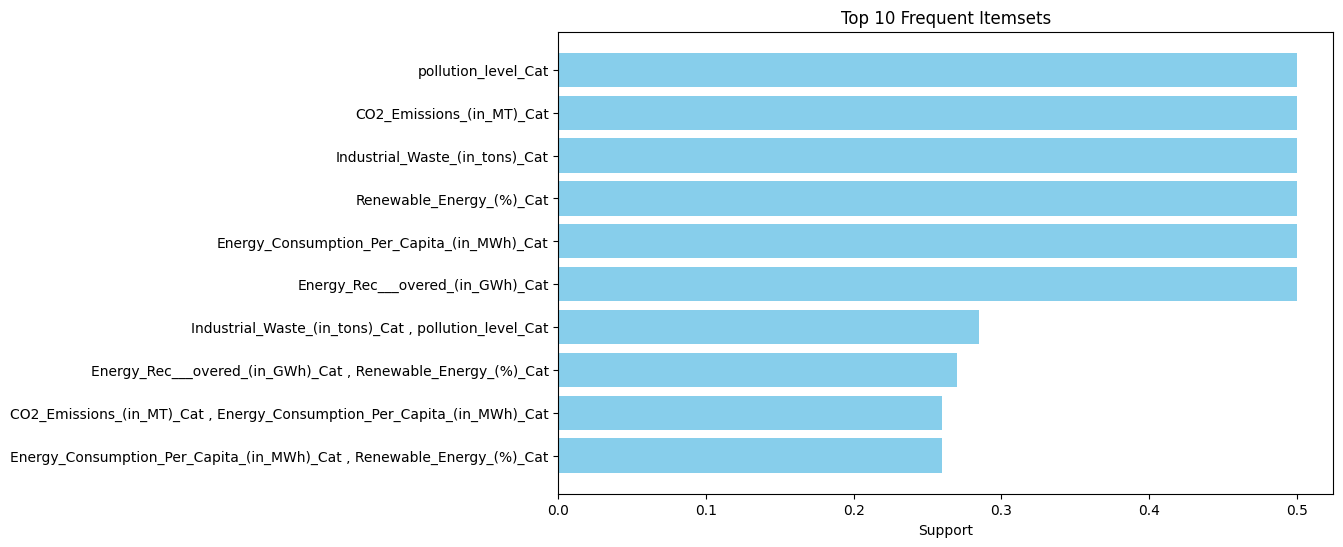

In [65]:
import matplotlib.pyplot as plt

# Take top 10 frequent itemsets
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(range(len(top_itemsets)), top_itemsets['support'], color='skyblue')
plt.yticks(range(len(top_itemsets)), [' , '.join(list(x)) for x in top_itemsets['itemsets']])
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()  # highest at top
plt.show()


In [66]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Split into train/test (optional)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(encoded_df, test_size=0.2, random_state=42)

# Step 2: Mine rules on training data
frequent_itemsets = apriori(train_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Step 3: Filter rules for your target
target = 'Energy_Rec___overed_(in_GWh)_Cat=1'
rules_target = rules[rules['consequents'].apply(lambda x: target in x)]

# Step 4: Evaluate on test data (pseudo-accuracy)
correct = 0
applied = 0
for idx, row in test_df.iterrows():
    for _, r in rules_target.iterrows():
        if all(row[a.replace('=1','').replace('_',' ')] for a in r['antecedents']):
            applied += 1
            if row[target.replace('_',' ')]:
                correct += 1

if applied > 0:
    pseudo_accuracy = correct / applied
    print("Pseudo-accuracy of rules on test set:", pseudo_accuracy)
else:
    print("No rules apply to test set rows")


No rules apply to test set rows


Final report 

The Apriori algorithm analyzed associations between pollution severity, CO₂ emissions, industrial waste, renewable energy, energy consumption, and energy recovery. Frequent itemsets showed all features occur frequently, with 50% support each (CO2_Emissions, Industrial_Waste, Renewable_Energy, Energy_Consumption_Per_Capita, Energy_Recovered). Association rules revealed moderate positive relationships: for example, CO2_Emissions=High → Energy_Recovered=High, Industrial_Waste=High → Energy_Recovered=High, and Renewable_Energy=High → Energy_Recovered=High, each with support 0.5, confidence 0.5, and lift 1.0. These results suggest that areas with higher pollution and industrial activity provide opportunities for energy recovery, and increasing renewable energy adoption can support better outcomes. While the rules are descriptive rather than predictive, they provide actionable insights for environmental policy and energy optimization.